In [2]:
import pandas as pd
import numpy as np
from models.MKNN import ModifiedKNN
import neattext.functions as nfx
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [2]:
df = pd.read_csv('Twitter_fresh/twitter_crawling.csv',encoding='latin1', usecols=['date','text'])
df.head()

,date,text
0,2022-08-11 12:44:23+00:00,@janeuaree Ayo kita buat money heist Indonesia...
1,2022-08-13 18:06:23+00:00,"@festieveal Iyhh hendry akskjhk bgtttt, ni jug..."
2,2022-08-12 20:19:36+00:00,"cuk, akhir2 ini tidur larut. sekitar jam 4 an ..."
3,2022-08-12 03:40:46+00:00,@Pak_Irv Professor itu gelar utk kepala tim pe...
4,2022-08-10 14:16:56+00:00,@Babylipp1 @sbyfess Serasa syuting money heist...


# Preprocessing

In [3]:
def casefolding(Text):
    Text = Text.lower()
    return Text

In [4]:
df['text'] = df['text'].apply(casefolding)
df.head()

,date,text
0,2022-08-11 12:44:23+00:00,@janeuaree ayo kita buat money heist indonesia...
1,2022-08-13 18:06:23+00:00,"@festieveal iyhh hendry akskjhk bgtttt, ni jug..."
2,2022-08-12 20:19:36+00:00,"cuk, akhir2 ini tidur larut. sekitar jam 4 an ..."
3,2022-08-12 03:40:46+00:00,@pak_irv professor itu gelar utk kepala tim pe...
4,2022-08-10 14:16:56+00:00,@babylipp1 @sbyfess serasa syuting money heist...


In [5]:
def punc_clean(Text):
        Text = nfx.remove_urls(Text)
        Text = nfx.remove_punctuations(Text)
        Text = nfx.remove_emojis(Text)
        Text = nfx.remove_special_characters(Text)
        Text = nfx.remove_numbers(Text)
        return Text

In [6]:
df['text'] = df['text'].apply(punc_clean)
df.head()

,date,text
0,2022-08-11 12:44:23+00:00,janeuaree ayo kita buat money heist indonesia wow
1,2022-08-13 18:06:23+00:00,festieveal iyhh hendry akskjhk bgtttt ni juga ...
2,2022-08-12 20:19:36+00:00,cuk akhir ini tidur larut sekitar jam an baru...
3,2022-08-12 03:40:46+00:00,pakirv professor itu gelar utk kepala tim pera...
4,2022-08-10 14:16:56+00:00,babylipp sbyfess serasa syuting money heist kak


In [7]:
def word_tokenize_wrapper(Text):
        return word_tokenize(Text)

In [8]:
df['text'] = df['text'].apply(word_tokenize_wrapper)
df.head()

,date,text
0,2022-08-11 12:44:23+00:00,"[janeuaree, ayo, kita, buat, money, heist, ind..."
1,2022-08-13 18:06:23+00:00,"[festieveal, iyhh, hendry, akskjhk, bgtttt, ni..."
2,2022-08-12 20:19:36+00:00,"[cuk, akhir, ini, tidur, larut, sekitar, jam, ..."
3,2022-08-12 03:40:46+00:00,"[pakirv, professor, itu, gelar, utk, kepala, t..."
4,2022-08-10 14:16:56+00:00,"[babylipp, sbyfess, serasa, syuting, money, he..."


In [13]:
def word_norm(tweets):
    word_dict = pd.read_csv('data/indonesia_slangWords.csv')
    norm_word_dict = {}
    for index, row in word_dict.iterrows():
        if row[0] not in norm_word_dict:
            norm_word_dict[row[0]] = row[1]
    return [norm_word_dict[term] if term in norm_word_dict else term for term in tweets]

In [14]:
df['text'] = df['text'].apply(word_norm)
df.head()

,date,text
0,2022-08-11 12:44:23+00:00,"[janeuaree, ayo, kita, buat, money, heist, ind..."
1,2022-08-13 18:06:23+00:00,"[festieveal, iyhh, hendry, akskjhk, bgtttt, in..."
2,2022-08-12 20:19:36+00:00,"[cuk, akhir, ini, tidur, larut, sekitar, jam, ..."
3,2022-08-12 03:40:46+00:00,"[pakirv, professor, itu, gelar, untuk, kepala,..."
4,2022-08-10 14:16:56+00:00,"[babylipp, sbyfess, serasa, syuting, money, he..."


In [15]:
def remove_stopword(Text):
    stopW = stopwords.words('indonesian', 'english')
    sw = pd.read_csv('data/stopwordbahasa.csv')
    stopW.extend(sw)
    remove_sw = ' '.join(Text)
    clean_sw = [word for word in remove_sw.split() if word.lower() not in stopW]
    return clean_sw

In [16]:
df['text'] = df['text'].apply(remove_stopword)
df.head()

,date,text
0,2022-08-11 12:44:23+00:00,"[janeuaree, ayo, money, heist, indonesia, wow]"
1,2022-08-13 18:06:23+00:00,"[festieveal, iyhh, hendry, akskjhk, bgtttt, pr..."
2,2022-08-12 20:19:36+00:00,"[cuk, tidur, larut, jam, an, tidur, dipaksa, b..."
3,2022-08-12 03:40:46+00:00,"[pakirv, professor, gelar, kepala, tim, peramp..."
4,2022-08-10 14:16:56+00:00,"[babylipp, sbyfess, serasa, syuting, money, he..."


In [ ]:
def indo_stem(Text):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    result = []
    for w in Text:
        result.append(stemmer.stem(w))
        result.append(" ")
    return " ".join(result)

In [ ]:
df['text'] = df['text'].apply(indo_stem)
df.head()

# Sentiment

In [3]:
from sklearn.model_selection import KFold
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import json

In [4]:
def Sentiment_analysis():
    df = pd.read_csv('Twitter_fresh\Clean Data\Twitter_dataset_Clean.csv', encoding='utf-8')

    # LexiconVader dengan custom Lexicon(bahasa indonesia)
    sia1A, sia1B = SentimentIntensityAnalyzer(), SentimentIntensityAnalyzer()
    # Hapus Default lexicon VADER
    sia1A.lexicon.clear()
    sia1B.lexicon.clear()

    # Read custom Lexicon Bahasa Indonesia
    data1A = open('data/lexicon_sentimen_negatif.txt', 'r').read()
    data1B = open('data/lexicon_sentimen_positif.txt', 'r').read()
    # convert lexicon to dictonary
    insetNeg = json.loads(data1A)
    insetPos = json.loads(data1B)

    # update lexicon vader with custom lexicon (b.indo)
    sia1A.lexicon.update(insetNeg)
    sia1B.lexicon.update(insetPos)

    # method untuk cek apa sentimen pos,neg,neu
    def is_positive_inset(Text: str) -> bool:
        return sia1A.polarity_scores(Text)["compound"] + sia1B.polarity_scores(Text)["compound"] >= 0.05

    tweets = df['text'].to_list()

    with open('output/Sentiment-result.txt', 'w+') as f:
        for tweet in tweets:
            label = "Positive" if is_positive_inset(tweet) else "Negative"
            f.write(str(label + "\n"))

    sen = pd.read_csv('output/Sentiment-result.txt', names=['Sentiment'])
    df = df.join(sen)

    ## Save clean Dataset
    df.to_csv('CleanText_Sentiment.csv', index=False)
    return df

In [5]:
sentiment_result = Sentiment_analysis()

In [6]:
sentiment_result.to_csv('output/Sentiment_result.csv', index=False)

# Models Algorithm

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
from sklearn.metrics import f1_score, recall_score
from heapq import nsmallest as nMin

In [8]:
k_value = 3 # 1 - 25
X = sentiment_result['text'].values
y = sentiment_result['Sentiment'].values
fold_i = 1
fold_n = 3 # 3 5 7 10
sum_accuracy = 0
kfold = KFold(fold_n, shuffle=True, random_state=42)
enc = LabelEncoder()
fol = []
acc, rc, pr, f1 = [], [], [], []

for train_index, test_index in kfold.split(X):
    fol.append(fold_i)
    X_train = X[train_index]
    y_train = y[train_index]
    X_test = X[test_index]
    y_test = y[test_index]
    
    svf = open('output/ResultX.txt', 'w')
    sv_text = '\n'.join(str(item) for item in X_test).replace("   "," ")
    svf.write(sv_text)
    svY = open ('output/y_train.txt', 'w')
    svY.write('\n'.join(str(item) for item in y_train))

    #TFIDF
    tf = TfidfVectorizer(decode_error="replace")
    X_train = tf.fit_transform(X_train)
    X_test = tf.transform(X_test)
    
    y_train = enc.fit_transform(y_train)
    y_test = enc.transform(y_test)

    # Algorithm
    clf = ModifiedKNN(k_value)
    clf.fit(X_train, y_train)
    pred, jarak = clf.predict(X_test)
    neigbor_index = clf.get_neigbors(X_test)

    # Confusion Matrix
    #cm = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)*100
    precision = precision_score(y_test, pred)*100
    recall = recall_score(y_test, pred)*100
    f1_scores = f1_score(y_test, pred)*100
    #plot_conf_metrics(y_test, pred)

    sum_accuracy += accuracy

    fold_i += 1
    acc.append(accuracy)
    pr.append(precision)
    rc.append(recall)
    f1.append(f1_scores)

1 = neigbor: [1, 0, 0]
0 = neigbor: [0, 1, 1]
0 = neigbor: [0, 0, 0]
0 = neigbor: [1, 0, 0]
1 = neigbor: [1, 1, 1]
0 = neigbor: [0, 0, 0]
1 = neigbor: [1, 1, 1]
0 = neigbor: [1, 0, 1]
0 = neigbor: [0, 0, 1]
0 = neigbor: [1, 0, 0]
0 = neigbor: [0, 0, 0]
0 = neigbor: [0, 0, 0]
1 = neigbor: [0, 0, 0]
0 = neigbor: [0, 0, 0]
1 = neigbor: [1, 1, 1]
1 = neigbor: [1, 1, 1]
0 = neigbor: [0, 0, 0]
0 = neigbor: [0, 1, 0]
1 = neigbor: [0, 0, 0]
0 = neigbor: [0, 0, 0]
0 = neigbor: [0, 0, 0]
0 = neigbor: [0, 0, 0]
0 = neigbor: [0, 0, 0]
0 = neigbor: [0, 0, 0]
1 = neigbor: [1, 1, 1]
0 = neigbor: [0, 0, 1]
1 = neigbor: [1, 1, 1]
1 = neigbor: [0, 1, 0]
0 = neigbor: [0, 1, 0]
0 = neigbor: [0, 0, 1]
0 = neigbor: [0, 0, 0]
0 = neigbor: [1, 0, 0]
0 = neigbor: [0, 1, 0]
0 = neigbor: [0, 0, 0]
0 = neigbor: [0, 0, 0]
0 = neigbor: [0, 0, 0]
0 = neigbor: [0, 0, 0]
0 = neigbor: [0, 0, 0]
0 = neigbor: [0, 0, 1]
1 = neigbor: [1, 1, 1]
0 = neigbor: [0, 0, 1]
0 = neigbor: [0, 0, 1]
0 = neigbor: [0, 0, 0]
0 = neigbor

In [9]:
with open("output/MKNN_prediction.txt", "w") as f:
    mknn_predited_label ='\n'.join(str(item) for item in pred)
    f.write(mknn_predited_label)
with open('output/jarak_ttg.txt', 'w') as g:
    jarak = [nMin(k_value,map(float,i)) for i in jarak]
    mknn_distance = '\n'.join(str(ls) for ls in jarak)
    g.write(mknn_distance)
with open('output/index_ttg.txt', 'w') as j:
    j.write('\n'.join(str(a) for a in neigbor_index))

In [10]:
knn_pred = pd.read_csv('output/MKNN_prediction.txt', names=['Sentiment'])
jarak_pred = pd.read_csv('output/jarak_ttg.txt', names=['Distance'], sep='\t')
text_test = pd.read_csv('output/ResultX.txt', names=['text'])
index_pred = pd.read_csv('output/index_ttg.txt', names=['Neigbor'])
text_test = text_test.join(knn_pred)
text_test = text_test.join(jarak_pred)
text_test = text_test.join(index_pred)
text_test['Sentiment'] = text_test['Sentiment'].apply(lambda x: 'Positive' if x == 1 else 'Negative')
text_test = text_test.dropna()

In [ ]:
text_test.head(11)

In [12]:
new_frame = pd.DataFrame(X_test)
new_frame = new_frame.join(knn_pred)

avg_acc = sum_accuracy/fold_n
maxs = max(acc)
mins = min(acc)
res_df = pd.DataFrame({'K Fold':fol, 'Accuracy': acc, 'Precison':pr, 'Recall':rc, 'f1 score':f1})
print("Avearge accuracy : ", str("%.4f" % avg_acc)+'%')
print("Max Score : ",str(maxs),"in Fold : ", str(acc.index(maxs)+1))
print("Min Score : ",str(mins), "in Fold : ", str(acc.index(mins)+1))

Avearge accuracy :  79.6501%
Max Score :  79.87987987987988 in Fold :  3
Min Score :  79.46026986506747 in Fold :  1


In [17]:
res_df.head()

,K Fold,Accuracy,Precison,Recall,f1 score
0,1,79.460270,52.083333,17.985612,26.737968
1,2,79.610195,73.170732,19.354839,30.612245
2,3,79.879880,80.000000,13.422819,22.988506


In [13]:
import matplotlib.pyplot as plot

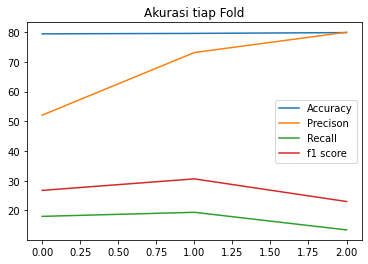

In [15]:
res_df[['Accuracy', 'Precison', 'Recall', 'f1 score']].plot.line(title="Akurasi tiap Fold")
plot.show(block=True)